In [1]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
%matplotlib inline

Решение нелинейных уравнений

Рассмотрим задачу численного нахождения корня $x^*$ нелинейного уравнения
$$
f(x) = 0, \qquad a\le x \le b, \qquad f(a)\cdot f(b)<0.
$$
Предполагается, что функция $f(x)$ непрерывна на отрезке $[a,b]$ и в концах этого отрезка принимает значения разных знаков.

## 1. Некоторые методы

### 1.1. Метод деления пополам

Метод *деления пополам* (или *дихотомии*, или *бисекции*) состоит в следующем.
На первой итерации находим середину отрезка $[a,b]$
$$
m = \frac{1}{2}(a+b)
$$
Если $f(a)\cdot f(m) < 0$, то полагаем $b=m$, иначе полагаем $a=m$.
В обоих случаях повторяем итерации для нового отрезка $[a,b]$, пока величина отрезка не станет меньше заданного значения.

Метод деления пополам имеет *линейную скорость сходимости* (также в этом случае говорят, что последовательность сходится со скоростью геометрической прогрессии). Если $x_k$ - середина отрезка на $k$-й итерации, то
$$
|x_{k+1} - x^*| \le \frac{1}{2} |x_k - x^*| \le \frac{|b-a|}{2^k}
$$


### 1.2. Метод Ньютона

*Метод Ньютона* (*метод касательных*) на каждой итерации $k$ аппроксимирует в текущей точке $x_k$ функцию $f(x)$ касательной к этой функции в точке $x_k$. Следующим приближением к $x^*$ является точка $x_{k+1}$ пересечения касательной 
$$
y = f(x_k) + (x-x_k) f'(x_k)
$$
с осью $Ox$:
$$
x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}.
$$

<img src='http://www.math.by/newton1.png'>

Если $f′(x)\ne 0$ и $f(x)$ имеет непрерывную вторую производную, то имеет место *квадратичная сходимость* метода Ньютона:
$$
|x_{k+1} - x^*| \le C |x_k - x^*|^2, \quad где \quad C = |f''(ξ)/(2f'(η))| 
$$
Итак, метод Ньютона работает быстрее, чем метод деления пополам, но требует вычисления производной.


### 1.3. Метод секущих

Заменим в методе Ньютона производную разделенной разностью: 
$$
f'(x_k)\approx\frac{f(x_k) - f(x_{k-1})}{x_k - x_{k-1}}
$$
получим *метод секущих* (или *метод хорд*):
$$
x_{k+1} = x_k - f(x_k)\frac{x_k - x_{k-1}}{f(x_k) - f(x_{k-1})}
$$

<img src=https://studfile.net/html/2706/298/html_a70QXs6983.h1q0/img-y3y3j8.png>

Если $f′(x)\ne 0$ и $f(x)$ имеет непрерывную вторую производную, то имеет место _сверхлинейная сходимость_:
$$
|x_{k+1} - x^*| \le C |x_k - x^*|^r, \quad где \quad r = \frac{1+\sqrt{5}}{2} = 1.618\dots, \quad C = \sqrt[r]{|f''(ξ)/(2f'(η))|}
$$
— медленне, чем метод Ньютона, но не нужно вычислять производные.

### 1.3. Обратная квадратичная интерполяция

Рассмотрим квадратичную функцию
$$
g(y) = 
 x_{k-2}\frac{(y-f_{k-1})(y-f_k)}{(f_{k-2}-f_{k-1})(f_{k-2}-f_k)}
+x_{k-1}\frac{(y-f_{k-2})(y-f_k)}{(f_{k-1}-f_{k-2})(f_{k-2}-f_k)}
+x_k    \frac{(y-f_{k-2})(y-f_{k-1})}{(f_k-f_{k-2})(f_k-f_{k-1})}
$$
Имеем $x_k=g(f_k)$, $x_{k-1}=g(f_{k-1})$, $x_{k-2}=g(f_{k-2})$.

В качестве очередного приближения берем
$$
x_{k+1} = g(0)
$$
Метод сходится чуть быстрее, чем метод секущих:
$$
|x_{k+1} - x^*| \le C |x_k - x^*|^r, \quad где \quad r = 1.839\dots
$$
но необходимы три начальные точки

### 1.4. Метод Брента

— сочетает методы деления пополам, секущих и обратной квадратичной интерполяции


## 2. Методы из модуля `optimize`

В модуле `optimize` реализован ряд методов для решения нелинейного уравнения.
Наиболее общей является функция `minimize_scalar()` В ней используемый метод можно указать явным образом задав параметр `method`. Но можно также воспользоваться "специальными" методами. В частности,
  * `bisect(f, a, b)` - реализует метод деления пополам; 
  * `brentq(f, a, b)` - модификация метода Брента;
  * `newton(fun, x0, fprime)` - метод Ньютона, где `x0` - начальное приближение, `fun` - функция, вычисляющая $f(x)$, `fprime` - функция, вычисляющая $f'(x)$; если `fprime` не задано, то используется метод секущих.
  
В качестве дополнительных параметров можно задавать, в частности,
  * `xtol` - абсолютная ошибка,
  * `rtol` - относительная ошибка,
  * `maxiter` - максимальное количество итераций.
 

In [2]:
from scipy.optimize import bisect, newton, brentq 

## 3. Примеры и эксперимент

Давайте поэкспериментируем с этими методами. В качестве тестового возьмем уравнение
$$
\sin(x) = 0,\qquad  3\le x \le 4.
$$
Вначале зададим функцию, вычисляющую $f(x)$:

In [3]:
def f(x):
    return np.sin(x)

И ее производную (понадобится для метода Ньютона):

In [4]:
def fprime(x):
    return np.cos(x)

Например, вызовем метод `brentq`:

In [5]:
brentq(f, 3, 4)

3.141592653589793

Можно получить дополнительную информацию (сошелся ли метод, количество вычислений функции, количество итераций):

In [6]:
x0, r = brentq(f, 3, 4, full_output = True)
x0, r

(3.141592653589793,       converged: True
            flag: 'converged'
  function_calls: 7
      iterations: 6
            root: 3.141592653589793)

In [7]:
x0, r = newton(f, 3, fprime=fprime, full_output=True)
x0, r

(3.141592653589793,       converged: True
            flag: 'converged'
  function_calls: 6
      iterations: 3
            root: 3.141592653589793)

Нам будет интересно в каких точках метод вычисляет $f(x)$ на каждой итерации, поэтому добавим сохранение этих точек в списке `x_all`:

In [8]:
def f_ext(x):
    x_all.append(x)
    return np.sin(x)

## 3.1. Метод деления пополам

In [9]:
x_all = []
x0 = bisect(f_ext, 3, 4)
x_all.append(x0)
x_bisect = x_all
x_bisect

[3.0,
 4.0,
 3.5,
 3.25,
 3.125,
 3.1875,
 3.15625,
 3.140625,
 3.1484375,
 3.14453125,
 3.142578125,
 3.1416015625,
 3.14111328125,
 3.141357421875,
 3.1414794921875,
 3.14154052734375,
 3.141571044921875,
 3.1415863037109375,
 3.1415939331054688,
 3.141590118408203,
 3.141592025756836,
 3.1415929794311523,
 3.141592502593994,
 3.1415927410125732,
 3.1415926218032837,
 3.1415926814079285,
 3.141592651605606,
 3.1415926665067673,
 3.1415926590561867,
 3.1415926553308964,
 3.1415926534682512,
 3.141592654399574,
 3.1415926539339125,
 3.141592653701082,
 3.1415926535846666,
 3.141592653642874,
 3.1415926536137704,
 3.1415926535992185,
 3.1415926535919425,
 3.1415926535883045,
 3.1415926535901235,
 3.1415926535901235]

Обратите внимание, что в методе деления пополам очередная цифра в ответе генерируется примерно за одно и то же счисло итераций (4 итераций). **Это по сути дела и означает линейную скорость сходимости.**

## 3.2. Метод секущих

In [10]:
x_all = []
x0 = newton(f_ext, 3)
x_all.append(x0)
x_secant = x_all
x_secant

[3.0,
 3.0004000000000004,
 3.142542483087832,
 3.1415894937885818,
 3.1415926535902665,
 3.1415926535897936]

## 3.3. Метод Ньютона

In [11]:
x_all = []
x0 = newton(f_ext, 3, fprime=fprime)
x_all.append(x0)
x_newton = x_all
x_newton

[3.0, 3.142546543074278, 3.141592653300477, 3.141592653589793]

## 3.4. Метод Брента

In [12]:
x_all = []
x0 = brentq(f_ext, 3, 4)
x_all.append(x0)
x_brent = x_all
x_brent

[3.0,
 4.0,
 3.157162792479947,
 3.14154625558915,
 3.1415926554589646,
 3.141592653589793,
 3.1415926535907945,
 3.141592653589793]

Теперь для каждого метода построим график зависимости абсолютной ошибки от номера итерации.

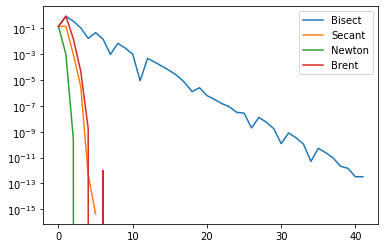

In [13]:
plt.semilogy(np.abs(np.array(x_bisect) - np.pi), label='Bisect')
plt.semilogy(np.abs(np.array(x_secant) - np.pi), label='Secant')
plt.semilogy(np.abs(np.array(x_newton) - np.pi), label='Newton')
plt.semilogy(np.abs(np.array(x_brent)  - np.pi), label='Brent')
plt.legend()
pass

Обратите внимание, что для метода деления пополам график ошибки в логарифмическом масштабе (по вертикальной оси) - практически прямая (**это и означает сходимость с линейной скоростью или со скоростью геометрической прогрессии!**) Для остальных методов - сходимость еще более быстрая!

## Выводы

1. Метод деления пополам - простой и надежный метод нахождения корня нелинейного уравнения, но не самый быстрый! Скорость сходимости у него - линейная.
2. У метода Ньютона - скорость сходимости квадратичная, но он требует вычисления производной.
3. Метод секущих работает быстрее метода деления пополам, но медленнее метода Ньютона.
4. Метод Брента и разные его модификации - это надежный метод, не требующий вычисления производных. Этот метод работает не медленне метода деления пополам. Как правило, это первый метод, который нужно попробовать для решения вашей задачи